In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import pandas as pd
ethnic_dataset = pd.read_csv("/content/drive/MyDrive/Representation Discrimination/data/ethnic_dataset_4893_after_removing_rakhain.csv")

In [5]:
articles = ethnic_dataset["content"].values.tolist()
articles[0]

'রমেল হত্যায় মানবাধিকার কমিশনের তদন্ত শুরুরাঙ্গামাটি প্রতিনিধিরাঙ্গামাটিতে পাহাড়ি ছাত্র পরিষদের (পিসিপি) নেতা রমেল চাকমার মৃত্যু নিয়ে অভিযোগ তদন্তে কার্যক্রম শুরু করেছে জাতীয় মানবাধিকার কমিশন। ঘটনাটিকে হত্যা দাবি করে নির্যাতনের কারণে রমেলের মৃত্যু হয়েছে বলে অভিযোগ করা হয়। এ ঘটনায় অভিযোগ তদন্তে তিন সদস্যের একটি কমিটি গঠন করে জাতীয় মানবাধিকার কমিশন। তদন্ত কমিটিতে জাতীয় মানবাধিকার কমিশনের সদস্য ও রাঙ্গামাটি সরকারি কলেজের সাবেক অধ্যক্ষ প্রফেসর বাঞ্চিতা চাকমাকে আহ্বায়ক, কমিশনের রাঙ্গামাটি অফিসের উপ-পরিচালক গাজী মো. সালাউদ্দিনকে সদস্যসচিব ও রাঙ্গামাটি জেলা প্রশাসনের নির্বাহী ম্যাজিস্ট্রেট অলি উজ্জামানকে সদস্য করা হয়েছে।সোনাগাজীতে অস্ত্রসহ যুবলীগ নেতা গ্রেফতারফেনী প্রতিনিধিফেনীর সোনাগাজী উপজেলার চরমজলিশপুর ইউনিয়নের কুঠিরহাটে ১টি বিদেশী পিস্তল ও ৪ রাউন্ড গুলিসহ যুবলীগ নেতা কামালকে গ্রেফতার করেছে পুলিশ। কামাল মজলিশপুরের আওয়ামী লীগের সাবেক সভাপতি মনজুতের রহমানের ছেলে ও ইউনিয়ন যুবলীগের সাবেক যুগ্ম-আহ্বায়ক। পুলিশ সূত্রে জানা যায়, গোপন সংবাদের ভিত্তিতে মঙ্গলবার সকাল ১১টা কুঠিরহাট বাজারে অভিযান চালি

In [6]:
len(articles)

4893

### COREX

In [7]:
!pip install corextopic
!!wget -O stop_words.txt https://raw.githubusercontent.com/aljubaer/Topic-Modeling-in-Bengali/master/code/stop_words.txt


['--2024-08-17 03:17:18--  https://raw.githubusercontent.com/aljubaer/Topic-Modeling-in-Bengali/master/code/stop_words.txt',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 5443 (5.3K) [text/plain]',
 'Saving to: ‘stop_words.txt’',
 '',
 '',
 'stop_words.txt        0%[                    ]       0  --.-KB/s               ',
 'stop_words.txt      100%[===================>]   5.32K  --.-KB/s    in 0s      ',
 '',
 '2024-08-17 03:17:18 (50.5 MB/s) - ‘stop_words.txt’ saved [5443/5443]',
 '']

In [8]:
stopwords_file = open('stop_words.txt', "r+", encoding='utf-8')
all_stopwords = stopwords_file.read()
stopwords = [word.strip() for word in all_stopwords.split()]
print(stopwords)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

In [9]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from corextopic import corextopic as ct
import scipy.sparse as ss
import regex

def custom_analyzer(text):
    words = regex.findall(r'\w{2,}', text) # extract words of at least 2 letters
    for w in words:
        yield w

vectorizer = CountVectorizer(stop_words=stopwords, analyzer = custom_analyzer, max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(articles)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


(4893, 20000)

In [10]:
words = list(np.asarray(vectorizer.get_feature_names_out()))

In [11]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words


(4893, 19635)

In [12]:
words[2000:2020]

['ইতোমধ্যেই',
 'ইত্তেফাক',
 'ইত্তেফাককে',
 'ইত্তেফাকের',
 'ইত্যাদি',
 'ইত্যাদিতে',
 'ইত্যাদির',
 'ইদানিং',
 'ইদানীং',
 'ইদিলপুর',
 'ইদ্রিছ',
 'ইদ্রিস',
 'ইন',
 'ইনচার্জ',
 'ইনজুরি',
 'ইনডোর',
 'ইনফরমেশন',
 'ইনভেস্টিগেশন',
 'ইনভেস্টিগেশনের',
 'ইনস্টিটিউট']

In [14]:
anchors_genre_mapping = {
    "Politics": ["নির্বাচন", "দল", "মন্ত্রী", "সংসদ", "ভোট", "প্রার্থী", "সরকার"],
    "Crime": ["হত্যা", "ডাকাতি", "ধর্ষণ", "মামলা", "পুলিশ", "গ্রেফতার", "জেল"],
    "International Affairs": ["জাতিসংঘ", "বৈঠক", "যুদ্ধ", "শান্তি", "চুক্তি", "কূটনীতি"],
    "Business & Economy": ["শেয়ারবাজার", "বিনিয়োগ", "মুদ্রাস্ফীতি", "ব্যাংক", "বাণিজ্য", "বাজেট"],
    "Sports": ["খেলা", "ক্রিকেট", "ফুটবল", "ম্যাচ", "স্বর্ণপদক", "প্রতিযোগিতা"],
    "Culture & Entertainment": ["সিনেমা", "নাটক", "সংগীত", "উৎসব", "নাচ", "অভিনয়"],
    "Jobs": ["নিয়োগ", "পরীক্ষা", "চাকরি", "কর্মসংস্থান", "ইন্টারভিউ"],
    "Lifestyle": ["ফ্যাশন", "খাদ্য", "ভ্রমণ", "বাড়ি", "স্বাস্থ্য", "রূপচর্চা"],
    "Health": ["রোগ", "চিকিৎসা", "হাসপাতাল", "স্বাস্থ্যবিধি", "ওষুধ", "টিকা"],
    "Environment": ["জলবায়ু", "দূষণ", "বনায়ন", "প্রাণী", "সংরক্ষণ", "নদী"],
    "Local News": ["ইউনিয়ন", "গ্রাম", "মসজিদ", "সড়ক", "উন্নয়ন", "বাজার"],
    "Education": ["পাঠ্যক্রম", "স্কুল", "পরীক্ষা", "শিক্ষার্থী", "শিক্ষক", "বিশ্ববিদ্যালয়"],
    "Technology": ["আইটি", "মোবাইল", "ইন্টারনেট", "সফটওয়্যার", "ডেটা", "প্রযুক্তি"],
    "Religion": ["ইসলাম", "মসজিদ", "ধর্ম", "পূজা", "উপাসনা", "ধর্মপ্রচার"],
    "Science": ["গবেষণা", "বিজ্ঞানী", "আবিষ্কার", "প্রযুক্তি", "মহাকাশ", "পরিবেশ"],
    "Protests and Social Movements": ["বিক্ষোভ", "ধর্মঘট", "আন্দোলন", "মানববন্ধন", "অধিকার", "পিকেটিং"],
    "Government Actions": ["নীতি", "উন্নয়ন", "বাজেট", "প্রকল্প", "আইন", "প্রশিক্ষণ"]
}

In [15]:
# [["ক্রীড়া", "রুপা", "স্বর্ণপদক",  "ব্রোঞ্জপদক"], ["নির্বাচন","প্রার্থী", "চেয়ারম্যান"], ["পর্যটক"], ["উদযাপন", "নবান্ন", "উৎসব"], ["বিদ্রোহ", "কল্পনা"], ["মামলা"] , ["সরকার", "লুটপাট", "দুর্নীতি", "প্রশিক্ষণ"], [ "সেতু", "সংস্কার", "সংকট", "পানি"], ["বাংলাদেশ", "বিমানবাহিনী", "অফিসার", "ক্যাডেট"] ]
anchors = anchors_genre_mapping.values()
corex_model = ct.Corex(n_hidden=50, seed=1)
corex_model.fit(doc_word, words=words, anchors=anchors, anchor_strength=3, docs=articles)

In [16]:
corex_model.tc

143.63331714565578

In [17]:
topics = corex_model.get_topics()
for topic_n, topic in enumerate(topics):
    # w: word, mi: mutual information, s: sign
    topic = [(w, mi, s) if s > 0 else ('~' + str(w), mi, s) for w, mi, s in topic]
    # Unpack the info about the topic
    topic_words, mis, signs = zip(*topic)

    topic_str = str(topic_n + 1) + ': ' + ', '.join(topic_words)
    print(topic_str)


1: সরকার, সংসদ, নির্বাচন, প্রার্থী, ভোট, আওয়ামী, লীগ, লীগের, নির্বাচনে, মন্ত্রী
2: পুলিশ, মামলা, গ্রেফতার, হত্যা, থানার, উদ্ধার, ঘটনায়, নিহত, ঘটনা, থানায়
3: চুক্তি, যুদ্ধ, দেশের, দেশ, বাংলাদেশের, দেশে, বাংলাদেশে, শান্তি, বলা, যার
4: ব্যাংক, বাণিজ্য, বাজেট, মংলা, বন্দর, পণ্য, বন্দরের, জাহাজ, ব্যাংকের, বন্দরে
5: ফুটবল, খেলা, ম্যাচ, ক্রিকেট, কোচ, গোলে, চ্যাম্পিয়ন, অনূর্ধ্ব, স্বর্ণপদক, খেলায়
6: উৎসব, বাংলা, নাচ, ভাষা, সংস্কৃতি, গান, ভাষায়, ভাষার, নাটক, ক্ষুদ্র
7: যে, না, কিন্তু, চাকরি, বা, তা, সেই, মনে, নয়, যদি
8: স্বাস্থ্য, খাদ্য, ভ্রমণ, কৃষি, চাষ, ধান, কমপ্লেক্সে, পরিবার, চাল, ফসল
9: হাসপাতাল, চিকিৎসা, হাসপাতালে, ছেলে, গ্রামের, তাকে, স্ত্রী, মৃত্যু, রোগ, মা
10: নদী, নদীর, পাহাড়, পানি, প্রাণী, প্রাকৃতিক, প্রকৃতির, পানির, সৌন্দর্য, পাহাড়ের
11: বাজার, গ্রাম, মসজিদ, বাজারে, বাজারের, দোকান, হাট, মসজিদের, জামে, দোকানদার
12: শিক্ষক, স্কুল, শিক্ষার্থী, শিক্ষা, বিদ্যালয়ের, বিদ্যালয়, পরীক্ষা, কলেজ, প্রাথমিক, কলেজের
13: মোবাইল, প্রযুক্তি, বিজ্ঞান, ইন্টারনেট, ফোন, আইটি, ফোনে, কম্পিউটার, শাহজালাল, গা

In [20]:
top_docs = corex_model.get_top_docs(n_docs=200, sort_by="tc")
THRESHOLD = 25.0
docs_per_topic = []
total_docs = 0
for topic_n, top_docs in enumerate(top_docs):
    docs, probs = zip(*top_docs)
    top_docs_above_threshold = [doc for doc,prob in zip(docs,probs) if prob > THRESHOLD]
    docs_per_topic.append(top_docs_above_threshold)
    total_docs += len(top_docs_above_threshold)
    print(f'Topic {topic_n}: {len(top_docs_above_threshold)}')
print(total_docs)

Topic 0: 168
Topic 1: 123
Topic 2: 161
Topic 3: 46
Topic 4: 146
Topic 5: 165
Topic 6: 200
Topic 7: 9
Topic 8: 71
Topic 9: 132
Topic 10: 2
Topic 11: 75
Topic 12: 7
Topic 13: 200
Topic 14: 124
Topic 15: 100
Topic 16: 30
Topic 17: 158
Topic 18: 8
Topic 19: 55
Topic 20: 20
Topic 21: 60
Topic 22: 30
Topic 23: 29
Topic 24: 27
Topic 25: 35
Topic 26: 0
Topic 27: 158
Topic 28: 198
Topic 29: 18
Topic 30: 91
Topic 31: 7
Topic 32: 50
Topic 33: 117
Topic 34: 21
Topic 35: 64
Topic 36: 40
Topic 37: 20
Topic 38: 57
Topic 39: 200
Topic 40: 46
Topic 41: 38
Topic 42: 53
Topic 43: 200
Topic 44: 57
Topic 45: 130
Topic 46: 13
Topic 47: 66
Topic 48: 145
Topic 49: 42
4012


In [22]:
docs_per_topic[41]

['উপক্রমণিকাএই রচনার শুরুতে উপক্রমণিকা জাতীয় কিছু লেখার পরিকল্পনা ছিল না আমার। সাধারণত আমি তা লিখিও না। কিন্তু একজন শোকাহত পিতার অপত্যবোধ এবং তীব্র আবেগ আমাকে এই অংশটি সংযোজিত করতে বাধ্য করেছে। তাছাড়া আমার সংসারজীবন শুরু করার আগেই এ রচনার বর্তমান পর্ব শেষ হয়ে যেত। ‘আত্মজীবনীর খণ্ডাংশ’ শিরোনামের লেখাটি শুরু করার সপ্তাহ দুই-তিন পর আমার চোখের মণিতুল্য কন্যা ফারিহা নুসরাত জেরিন পূর্বা মাত্র তিনদিনের শারীরিক ব্যাধিজনিত জটিলতায় এই পৃথিবীর বন্ধন ছিন্ন করে না-ফেরার দেশে পাড়ি জমায়। মাত্র একুশ বছরের সদ্য তরুণী কন্যাটি ছিল, এক অর্থে, আমার অস্তিত্বের অংশ। আমার সার্বিক সত্তার বড় এক জায়গাজুড়ে ছিল ও।চলে যাওয়ার দুই সপ্তাহ পর ইংরেজি অনার্স দ্বিতীয় বর্ষের ফাইনাল পরীক্ষায় বসার কথা ছিল ওর। জাহাঙ্গীরনগর বিশ্ববিদ্যালয়ের মেধাবী ছাত্রী ছিল। ছিল ওর বন্ধুদের মধ্যমণি।কত স্বপ্ন ছিল ওর! প্যাশন ছিল সাহিত্য, সংগীত, চিত্রকলা, ফটোগ্রাফি, চলচ্চিত্রসহ সুকুমার শিল্পের সব শাখার প্রতি। সাহিত্যের ছাত্রী হয়েও কম্পিউটার সায়েন্স ও তথ্যপ্রযুক্তির খুঁটিনাটি সম্পর্কে ধারণা রাখত। আমার এই অকালে ঝরে যাওয়া আদরের কন্যার স্মৃতি আমাকে আ

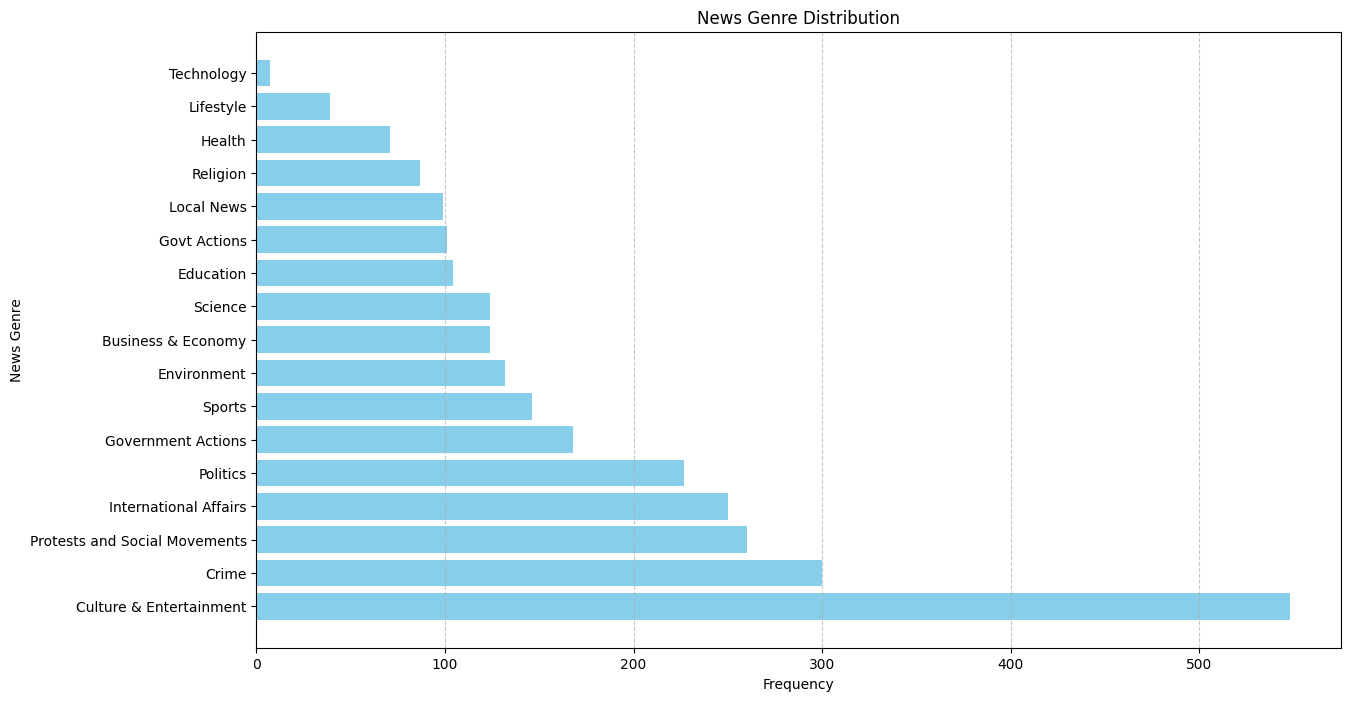

In [25]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Raw data
data = [
    (168, 'Government Actions, Politics'),
    (123, 'Crime'),
    (161, 'International Affairs'),
    (46, 'Business & Economy'),
    (146, 'Sports'),
    (165, 'Culture & Entertainment'),
    (9, 'Lifestyle'),
    (71, 'Health'),
    (132, 'Environment'),
    (2, 'Local News'),
    (75, 'Education'),
    (7, 'Technology'),
    (124, 'Science'),
    (100, 'Protests and Social Movements'),
    (30, 'Govt Actions, Business & Economy'),
    (158, 'Culture & Entertainment'),
    (8, 'Local News'),
    (55, 'Protests and Social Movements'),
    (20, 'Crime'),
    (60, 'International Affairs'),
    (30, 'Lifestyle, Religion'),
    (29, 'Education, International Affairs'),
    (35, 'Business & Economy'),
    (18, 'Govt Actions, Local News'),
    (91, 'Crime'),
    (50, 'Protests and Social Movements, Local News'),
    (21, 'Politics, Local News'),
    (57, 'Religion'),
    (38, 'Politics, Culture & Entertainment'),
    (53, 'Govt Actions'),
    (57, 'Culture & Entertainment'),
    (130, 'Culture & Entertainment'),
    (13, 'Protests and Social Movements, Business & Economy'),
    (66, 'Crime'),
    (42, 'Protests and Social Movements'),
]

# Aggregating the data by genre
genre_counts = defaultdict(int)

for count, genres in data:
    for genre in genres.split(','):
        genre_counts[genre.strip()] += count

# Sorting the genres for better visualization
sorted_genres = sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)

# Plotting the data
plt.figure(figsize=(14, 8))
genres, counts = zip(*sorted_genres)
plt.barh(genres, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('News Genre')
plt.title('News Genre Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
TIME = "110724"
EXPERIMENT_NAME = "nonethnic_100k_corex"

In [ ]:
joblib.dump(docs_per_topic, "/content/drive/MyDrive/Representation Discrimination/{EXPERIMENT_NAME}_docs_per_topic_{TIME}.joblib")

['/content/drive/MyDrive/Representation Discrimination/docs_per_topic_28July.joblib']